# Analysis of Bicycle Owners

This dataset contains the following columns: Martial Status, Gender, Income, Children, Education, Occupation, Home Owner, Cars, Commute Distance, Region, Age, and Purchase Bike.

In [86]:
# Imports

import pandas as pd
from pandas._libs.tslibs import dtypes
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [87]:
# Upload BikeData.csv save as dataframe 'bike'

bike = pd.read_csv('BikeData.csv')

In [88]:
print(f'The bike dataframes shape is {bike.shape}')

The bike dataframes shape is (1000, 12)


In [89]:
# Print the first look at our data

print(bike.head(11))

   Marital Status  Gender    Income  Children            Education  \
0         Married  Female   40000.0       1.0            Bachelors   
1         Married    Male   30000.0       3.0      Partial College   
2         Married    Male   80000.0       5.0      Partial College   
3          Single     NaN   70000.0       0.0            Bachelors   
4          Single    Male   30000.0       0.0            Bachelors   
5         Married  Female   10000.0       2.0      Partial College   
6          Single    Male  160000.0       2.0          High School   
7         Married    Male   40000.0       1.0            Bachelors   
8             NaN    Male   20000.0       2.0  Partial High School   
9         Married    Male       NaN       2.0      Partial College   
10        Married  Female   30000.0       3.0          High School   

        Occupation Home Owner  Cars Commute Distance   Region   Age  \
0   Skilled Manual        Yes   0.0        0-1 Miles   Europe  42.0   
1         Clerica

Some of the columns have names with spaces, I'm going to make things easier on myself and take the spaces out.

In [90]:
bike.columns = ['MaritalStatus', 'Gender', 'Income', 'Children', 'Education', 
                'Occupation', 'HomeOwner', 'Cars', 'CommuteDistance', 'Region', 
                'Age', 'PurchasedBike']

In [91]:
# Checking the column names changed.

print(bike.columns)

Index(['MaritalStatus', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'HomeOwner', 'Cars', 'CommuteDistance', 'Region', 'Age',
       'PurchasedBike'],
      dtype='object')


In [92]:
# Look at the types of data in the columns

bike.dtypes

MaritalStatus       object
Gender              object
Income             float64
Children           float64
Education           object
Occupation          object
HomeOwner           object
Cars               float64
CommuteDistance     object
Region              object
Age                float64
PurchasedBike       object
dtype: object

In [93]:
# Summary statistics for our numerical variables rounded to 2 decimal places.

round(bike.describe(), 2)

,Income,Children,Cars,Age
count,994.00,992.00,991.00,992.00
mean,56267.61,1.91,1.46,44.18
std,31067.82,1.63,1.12,11.36
min,10000.00,0.00,0.00,25.00
25%,30000.00,0.00,1.00,35.00
50%,60000.00,2.00,1.00,43.00
75%,70000.00,3.00,2.00,52.00
max,170000.00,5.00,4.00,89.00


## Cleaning & Checking for Nulls

In [94]:
# for loop that counts the number of nulls in each feature and returns the value.

for i in bike.columns:
  nulls = sum(bike[i].isnull())
  print('Variable {} includes {} NaN entries'.format(i, (sum(bike[i].isnull()))))

Variable MaritalStatus includes 7 NaN entries
Variable Gender includes 11 NaN entries
Variable Income includes 6 NaN entries
Variable Children includes 8 NaN entries
Variable Education includes 0 NaN entries
Variable Occupation includes 0 NaN entries
Variable HomeOwner includes 4 NaN entries
Variable Cars includes 9 NaN entries
Variable CommuteDistance includes 0 NaN entries
Variable Region includes 0 NaN entries
Variable Age includes 8 NaN entries
Variable PurchasedBike includes 0 NaN entries


Only 7 features are missing values.
* MaritalStatus
* Gender
* Income
* Children
* HomeOwner
* Cars
* Age

For numeric variables, I'll replace their missing values with their mean.

In [95]:
# Numeric Variables

bike['Income'].fillna(bike['Income'].mean(), inplace=True)
bike['Children'].fillna(bike['Children'].mean(), inplace=True)
bike['Cars'].fillna(bike['Cars'].mean(), inplace=True)
bike['Age'].fillna(bike['Age'].mean(), inplace=True)

Now the remaining missing variables are
* MaritalStatus
* Gender
* HomeOwner

I'm going to fill these with "Missing"

In [96]:
# fill remaining categorical variable NaN with 'missing'

bike = bike.fillna('missing')

In [97]:
# Checking to see if any NaN slipped through

for i in bike.columns:
  nulls = sum(bike[i].isnull())
  print('Variable {} includes {} NaN entries'.format(i, (sum(bike[i].isnull()))))

Variable MaritalStatus includes 0 NaN entries
Variable Gender includes 0 NaN entries
Variable Income includes 0 NaN entries
Variable Children includes 0 NaN entries
Variable Education includes 0 NaN entries
Variable Occupation includes 0 NaN entries
Variable HomeOwner includes 0 NaN entries
Variable Cars includes 0 NaN entries
Variable CommuteDistance includes 0 NaN entries
Variable Region includes 0 NaN entries
Variable Age includes 0 NaN entries
Variable PurchasedBike includes 0 NaN entries


## Vizualizations

Text(0, 0.5, 'Frequency')

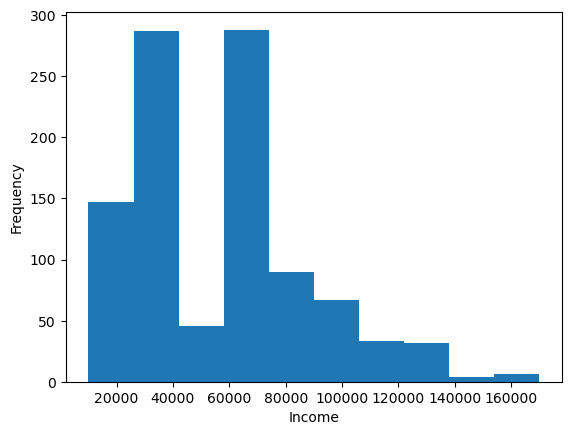

In [98]:
# Starting with Income, I'll create a histogram to check for skew

plt.hist(bike['Income'], bins=10)
plt.xlabel('Income')
plt.ylabel('Frequency')

The Income histogram definitely seems skewed

[Text(0, 0, 'Partial High School'),
 Text(1, 0, 'High School'),
 Text(2, 0, 'Partial College'),
 Text(3, 0, 'Bachelors'),
 Text(4, 0, 'Graduate Degree')]

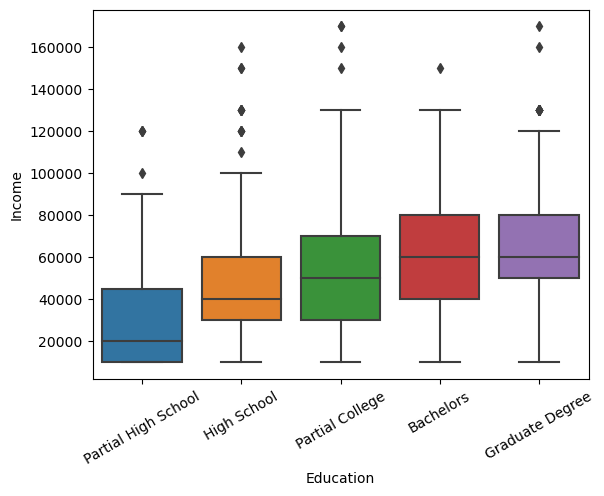

In [99]:
# Boxplots to show the different education levels plotted with income.

boxplot = sns.boxplot(data=bike, x='Education', y='Income', order = ["Partial High School", "High School", "Partial College", "Bachelors", "Graduate Degree"])
boxplot.set_xticklabels(boxplot.get_xticklabels(),rotation=30)

We can see evidence that as education increases, so does average income.

<Axes: xlabel='Age', ylabel='Income'>

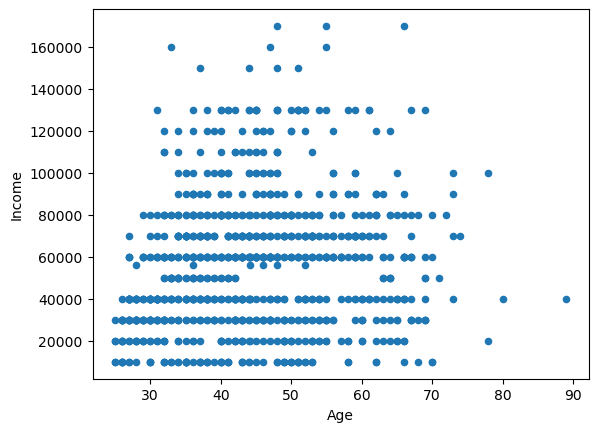

In [100]:
# Age vs Income, scatterplot to compare

bike.plot(kind='scatter', x='Age', y='Income')

# Subsetting a Dataset

In [101]:
# Creating a second dataframe with only Education, Gender, Income, and Age.
# Name it Income

income = bike[['Education', 'Gender', 'Income', 'Age']]
income.head()

,Education,Gender,Income,Age
0,Bachelors,Female,40000.0,42.0
1,Partial College,Male,30000.0,43.0
2,Partial College,Male,80000.0,60.0
3,Bachelors,missing,70000.0,41.0
4,Bachelors,Male,30000.0,36.0


In [102]:
# Groupby on the categorical variables Education and Gender to display avg income & age 
# broken down by gender and education level and rounded to 2 decimal places.

grouped = income.groupby(['Gender', 'Education'])
round(grouped.aggregate({'Income':np.mean, 'Age':np.mean}), 2)

Income    Age
Gender  Education                           
Female  Bachelors            64084.02  45.97
        Graduate Degree      63548.39  43.07
        High School          44500.00  45.15
        Partial College      51335.36  43.53
        Partial High School  29736.84  39.95
Male    Bachelors            61975.92  44.85
        Graduate Degree      68734.18  47.02
        High School          49154.22  43.23
        Partial College      57228.96  42.65
        Partial High School  39210.53  44.13
missing Bachelors            62000.00  40.44
        Graduate Degree      80000.00  39.50
        Partial College      72500.00  45.75